<a href="https://colab.research.google.com/github/katalinka09/1-labor/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [7]:
# 1. Определяем входные и выходные переменные
distance = ctrl.Antecedent(np.arange(0, 501, 1), "distance")  # 0-500 км
speed = ctrl.Antecedent(np.arange(0, 201, 1), "speed")        # 0-200 км/ч
budget = ctrl.Antecedent(np.arange(0, 201, 1), "budget")      # 0-200 $
transport = ctrl.Consequent(np.arange(0, 101, 1), "transport") # 0-100 (шкала рекомендаций)

In [8]:
# 2. Определение функций принадлежности для входных переменных

# Дальность перемещения - используем трапецевидные функции
distance['short'] = fuzz.trapmf(distance.universe, [0, 0, 30, 50])
distance['medium'] = fuzz.trapmf(distance.universe, [30, 50, 200, 300])
distance['long'] = fuzz.trapmf(distance.universe, [200, 300, 500, 500])

# Скорость - используем треугольные функции
speed['low'] = fuzz.trimf(speed.universe, [0, 0, 60])
speed['moderate'] = fuzz.trimf(speed.universe, [0, 60, 120])
speed['high'] = fuzz.trimf(speed.universe, [60, 120, 200])

# Бюджет - используем гауссовы функции
budget['low'] = fuzz.gaussmf(budget.universe, 0, 15)
budget['medium'] = fuzz.gaussmf(budget.universe, 50, 25)
budget['high'] = fuzz.gaussmf(budget.universe, 100, 30)

In [9]:
# 3. Функции принадлежности для выходной переменной "рекомендация транспорта"
transport['bicycle'] = fuzz.trimf(transport.universe, [0, 0, 25])
transport['bus'] = fuzz.trimf(transport.universe, [0, 25, 50])
transport['car'] = fuzz.trimf(transport.universe, [25, 50, 75])
transport['train'] = fuzz.trimf(transport.universe, [50, 75, 100])
transport['airplane'] = fuzz.trimf(transport.universe, [75, 100, 100])


Функции принадлежности для входных и выходных переменных:


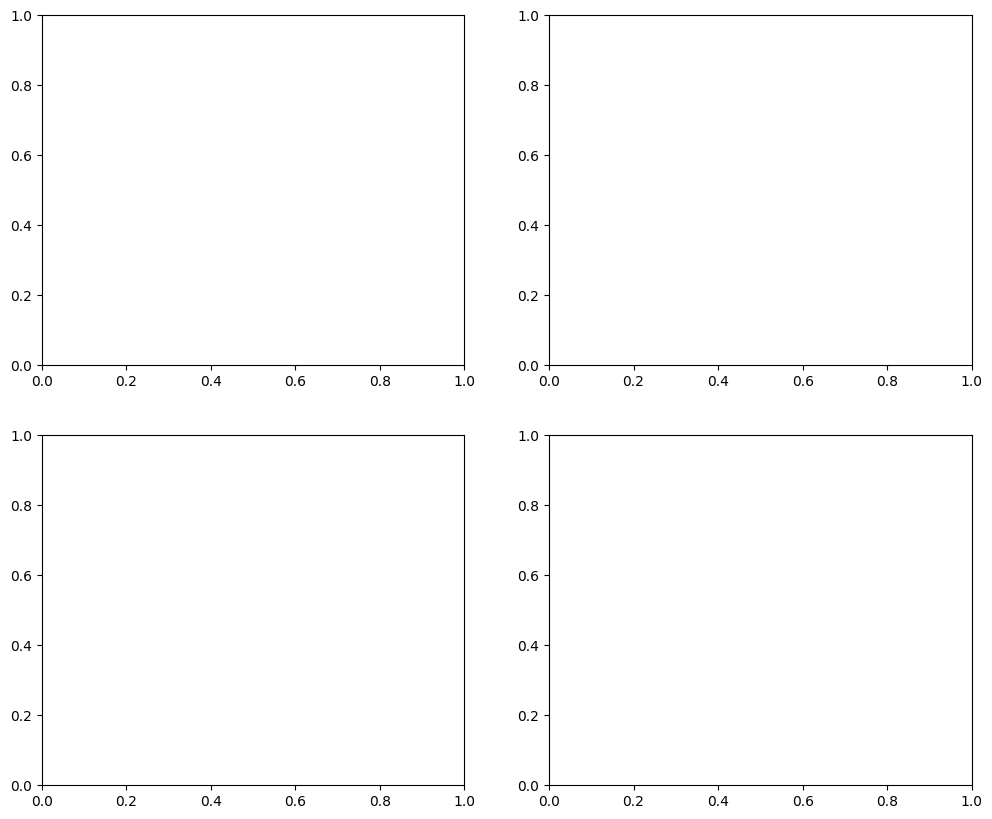

In [11]:
# 4. Визуализация функций принадлежности
print("Функции принадлежности для входных и выходных переменных:")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

Text(0.5, 1.0, 'Дальность перемещения')

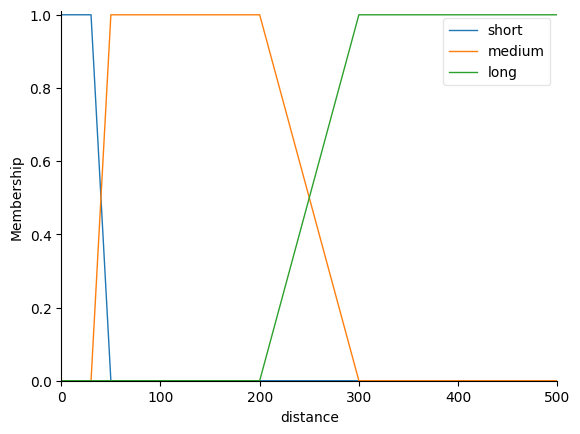

In [12]:
distance.view(ax=axes[0, 0])
axes[0, 0].set_title('Дальность перемещения')

Text(0.5, 1.0, 'Скорость')

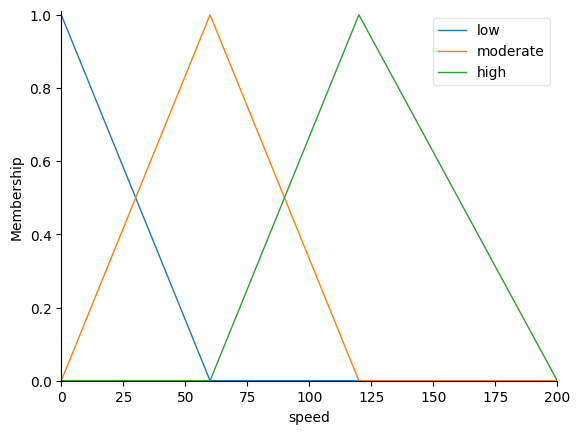

In [13]:
speed.view(ax=axes[0, 1])
axes[0, 1].set_title('Скорость')


Text(0.5, 1.0, 'Бюджет')

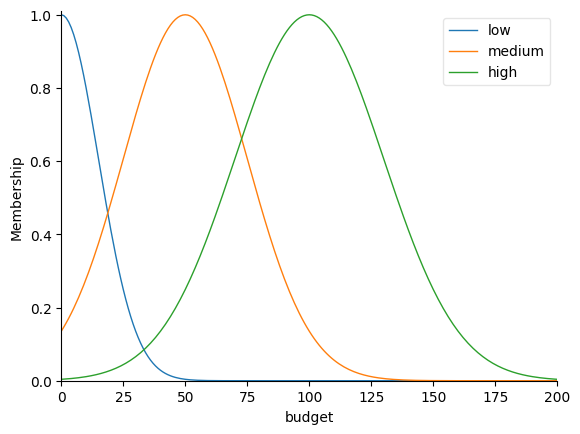

In [14]:
budget.view(ax=axes[1, 0])
axes[1, 0].set_title('Бюджет')

Text(0.5, 1.0, 'Рекомендация транспорта')

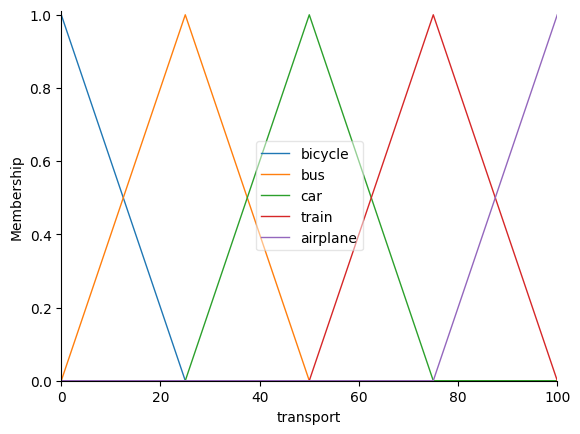

In [15]:
transport.view(ax=axes[1, 1])
axes[1, 1].set_title('Рекомендация транспорта')


In [16]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [17]:
# 5. Правила нечеткого вывода
rules = [
    # Правила для коротких дистанций
    ctrl.Rule(distance['short'] & speed['low'] & budget['low'], transport['bicycle']),
    ctrl.Rule(distance['short'] & speed['low'] & budget['medium'], transport['bicycle']),
    ctrl.Rule(distance['short'] & speed['low'] & budget['high'], transport['car']),

    ctrl.Rule(distance['short'] & speed['moderate'] & budget['low'], transport['bicycle']),
    ctrl.Rule(distance['short'] & speed['moderate'] & budget['medium'], transport['car']),
    ctrl.Rule(distance['short'] & speed['moderate'] & budget['high'], transport['car']),

    ctrl.Rule(distance['short'] & speed['high'] & budget['low'], transport['car']),
    ctrl.Rule(distance['short'] & speed['high'] & budget['medium'], transport['car']),
    ctrl.Rule(distance['short'] & speed['high'] & budget['high'], transport['car']),

    # Правила для средних дистанций
    ctrl.Rule(distance['medium'] & speed['low'] & budget['low'], transport['bus']),
    ctrl.Rule(distance['medium'] & speed['low'] & budget['medium'], transport['bus']),
    ctrl.Rule(distance['medium'] & speed['low'] & budget['high'], transport['train']),

    ctrl.Rule(distance['medium'] & speed['moderate'] & budget['low'], transport['bus']),
    ctrl.Rule(distance['medium'] & speed['moderate'] & budget['medium'], transport['train']),
    ctrl.Rule(distance['medium'] & speed['moderate'] & budget['high'], transport['train']),

    ctrl.Rule(distance['medium'] & speed['high'] & budget['low'], transport['train']),
    ctrl.Rule(distance['medium'] & speed['high'] & budget['medium'], transport['train']),
    ctrl.Rule(distance['medium'] & speed['high'] & budget['high'], transport['airplane']),

    # Правила для длинных дистанций
    ctrl.Rule(distance['long'] & speed['low'] & budget['low'], transport['bus']),
    ctrl.Rule(distance['long'] & speed['low'] & budget['medium'], transport['train']),
    ctrl.Rule(distance['long'] & speed['low'] & budget['high'], transport['train']),

    ctrl.Rule(distance['long'] & speed['moderate'] & budget['low'], transport['train']),
    ctrl.Rule(distance['long'] & speed['moderate'] & budget['medium'], transport['train']),
    ctrl.Rule(distance['long'] & speed['moderate'] & budget['high'], transport['airplane']),

    ctrl.Rule(distance['long'] & speed['high'] & budget['low'], transport['train']),
    ctrl.Rule(distance['long'] & speed['high'] & budget['medium'], transport['airplane']),
    ctrl.Rule(distance['long'] & speed['high'] & budget['high'], transport['airplane']),
]


In [18]:
# 6. Создание системы управления
transport_ctrl = ctrl.ControlSystem(rules)
transport_sim = ctrl.ControlSystemSimulation(transport_ctrl)

def get_transport_recommendation(value):
    """Преобразует числовое значение в вербальную рекомендацию"""
    if value <= 25:
        return "🚲 Велосипед"
    elif value <= 50:
        return "🚌 Автобус"
    elif value <= 75:
        return "🚗 Автомобиль"
    elif value <= 100:
        return "🚆 Поезд"
    else:
        return "✈️ Самолет"


In [19]:
# 7. Тестирование системы
test_cases = [
    (25, 40, 5, "Короткая дистанция, низкая скорость, низкий бюджет"),
    (40, 80, 30, "Короткая дистанция, умеренная скорость, средний бюджет"),
    (35, 100, 80, "Короткая дистанция, высокая скорость, высокий бюджет"),
    (150, 70, 20, "Средняя дистанция, умеренная скорость, низкий бюджет"),
    (200, 90, 60, "Средняя дистанция, высокая скорость, средний бюджет"),
    (250, 150, 120, "Средняя дистанция, высокая скорость, высокий бюджет"),
    (400, 80, 40, "Длинная дистанция, умеренная скорость, средний бюджет"),
    (450, 180, 80, "Длинная дистанция, высокая скорость, средний бюджет"),
    (400, 160, 150, "Длинная дистанция, высокая скорость, высокий бюджет"),
]

print("=" * 80)
print("РЕЗУЛЬТАТЫ ТЕСТИРОВАНИЯ СИСТЕМЫ РЕКОМЕНДАЦИИ ТРАНСПОРТА")
print("=" * 80)

for i, (dist, spd, bud, desc) in enumerate(test_cases, 1):
    try:
        transport_sim.input['distance'] = dist
        transport_sim.input['speed'] = spd
        transport_sim.input['budget'] = bud
        transport_sim.compute()

        result = transport_sim.output['transport']
        recommendation = get_transport_recommendation(result)

        print(f"\nТест {i}: {desc}")
        print(f"   Входные данные: {dist} км, {spd} км/ч, {bud}$")
        print(f"   Рекомендация: {recommendation} (значение: {result:.2f})")

    except Exception as e:
        print(f"Ошибка в тесте {i}: {e}")

РЕЗУЛЬТАТЫ ТЕСТИРОВАНИЯ СИСТЕМЫ РЕКОМЕНДАЦИИ ТРАНСПОРТА

Тест 1: Короткая дистанция, низкая скорость, низкий бюджет
   Входные данные: 25 км, 40 км/ч, 5$
   Рекомендация: 🚌 Автобус (значение: 27.27)

Тест 2: Короткая дистанция, умеренная скорость, средний бюджет
   Входные данные: 40 км, 80 км/ч, 30$
   Рекомендация: 🚗 Автомобиль (значение: 57.48)

Тест 3: Короткая дистанция, высокая скорость, высокий бюджет
   Входные данные: 35 км, 100 км/ч, 80$
   Рекомендация: 🚗 Автомобиль (значение: 58.63)

Тест 4: Средняя дистанция, умеренная скорость, низкий бюджет
   Входные данные: 150 км, 70 км/ч, 20$
   Рекомендация: 🚗 Автомобиль (значение: 51.52)

Тест 5: Средняя дистанция, высокая скорость, средний бюджет
   Входные данные: 200 км, 90 км/ч, 60$
   Рекомендация: 🚆 Поезд (значение: 77.15)

Тест 6: Средняя дистанция, высокая скорость, высокий бюджет
   Входные данные: 250 км, 150 км/ч, 120$
   Рекомендация: 🚆 Поезд (значение: 88.89)

Тест 7: Длинная дистанция, умеренная скорость, средний бюдж


ДЕМОНСТРАЦИОННЫЙ ПРИМЕР

Дистанция: 180 км, Скорость: 95 км/ч, Бюджет: 45$
Рекомендация: 🚗 Автомобиль (значение: 74.20)

Дистанция: 80 км, Скорость: 50 км/ч, Бюджет: 15$
Рекомендация: 🚌 Автобус (значение: 45.95)

Дистанция: 350 км, Скорость: 140 км/ч, Бюджет: 90$
Рекомендация: 🚆 Поезд (значение: 91.25)


<Figure size 1000x600 with 0 Axes>

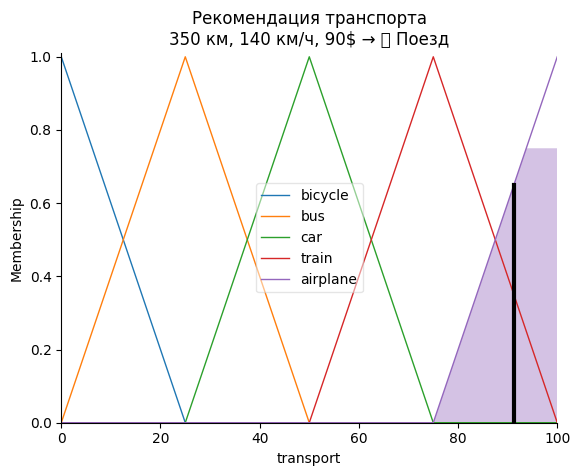


СИСТЕМА УСПЕШНО РЕАЛИЗОВАНА!
Использованы все три типа функций принадлежности:
  • Трапецевидные - для дистанции
  • Треугольные - для скорости
  • Гауссовы - для бюджета


In [20]:
# 8. Интерактивный пример
print("\n" + "=" * 80)
print("ДЕМОНСТРАЦИОННЫЙ ПРИМЕР")
print("=" * 80)

demo_cases = [
    (180, 95, 45),
    (80, 50, 15),
    (350, 140, 90)
]

for dist, spd, bud in demo_cases:
    transport_sim.input['distance'] = dist
    transport_sim.input['speed'] = spd
    transport_sim.input['budget'] = bud
    transport_sim.compute()

    result = transport_sim.output['transport']
    recommendation = get_transport_recommendation(result)

    print(f"\nДистанция: {dist} км, Скорость: {spd} км/ч, Бюджет: {bud}$")
    print(f"Рекомендация: {recommendation} (значение: {result:.2f})")

    # Визуализация для последнего демо-примера
    if demo_cases.index((dist, spd, bud)) == len(demo_cases) - 1:
        plt.figure(figsize=(10, 6))
        transport.view(sim=transport_sim)
        plt.title(f'Рекомендация транспорта\n{dist} км, {spd} км/ч, {bud}$ → {recommendation}')
        plt.show()

print("\n" + "=" * 80)
print("СИСТЕМА УСПЕШНО РЕАЛИЗОВАНА!")
print("Использованы все три типа функций принадлежности:")
print("  • Трапецевидные - для дистанции")
print("  • Треугольные - для скорости")
print("  • Гауссовы - для бюджета")
print("=" * 80)